In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import gc
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28

In [2]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def formatter(x,pos):
    return format(np.log10(x), '.0f')

## Plot overall evolution... 

In [3]:
old    = "/Users/earnric/Research/RAMSES-Data/27Aug-3Mpc/"
sfrOld = np.loadtxt(old + "new-data3Mpc.txt", skiprows=1)

firstRun    = "/Users/earnric/Research/RAMSES-Data/04Apr16_3MpcNewStarParam-2/04Apr16_3MpcNewStarParam-2-output/"
srfFirstRun = np.loadtxt(firstRun + "StarParicle-data3Mpc.txt", skiprows=1)

prefix = "./"
sfr    = np.loadtxt(prefix + "StarParicle-data3Mpc.txt", skiprows=1)

In [4]:
# {
# {"z", "tStart", "tEnd", "totStarMass", "totPop3StarMass", 
#  "totPollStarMass", "totPrimordStarMass", "totGasMass", 
#  "totPristGasMass", "totSubcritStarMass", "totNonPrimordStarMass"}
# }

In [ ]:
madz = np.array([4.9,5.9,7,7.9])
madlogy = np.array([-1.42, -1.65, -1.79, -2.09])
maderrs = np.array([.06,.08,.1,.11])
madsfr = 10**madlogy

# Error bars
# We need the lengths of each error bar so we have to subtract smaller value from larger...
lower = 10**madlogy-10**(madlogy-maderrs)
upper = 10**(madlogy+maderrs)-10**madlogy
#upper = np.array([0,0,0,0])

madyerr = [lower,upper] 

In [5]:
h = 0.71
deltaTold = sfrOld[:, 2] - sfrOld[:, 1]
nmlzeold  = 1.0 / deltaTold / (3.0**3) * h**3

deltaFR = srfFirstRun[:, 2] - srfFirstRun[:, 1]
nmlzeFR  = 1.0 / deltaFR / (3.0**3) * h**3

deltaT = sfr[:, 2] - sfr[:, 1]
nmlze  = 1.0 / deltaT / (3.0**3) * h**3

In [6]:
zDataold       = sfrOld[:,0]
totStarMassold = sfrOld[:,3] * nmlzeold
popIIIMassold  = sfrOld[:,4] * nmlzeold
pollMassold    = sfrOld[:,5] * nmlzeold
primordMassold = sfrOld[:,6] * nmlzeold
pristMassold   = sfrOld[:,8] * nmlzeold
subCritMassold = sfrOld[:,9] * nmlzeold

zDatafr       = srfFirstRun[:,0]
totStarMassfr = srfFirstRun[:,3] * nmlzeFR
popIIIMassfr  = srfFirstRun[:,4] * nmlzeFR
pollMassfr    = srfFirstRun[:,5] * nmlzeFR
primordMassfr = srfFirstRun[:,6] * nmlzeFR
pristMassfr   = srfFirstRun[:,8] * nmlzeFR
subCritMassfr = srfFirstRun[:,9] * nmlzeFR

zData       = sfr[:,0]
totStarMass = sfr[:,3] * nmlze
popIIIMass  = sfr[:,4] * nmlze
pollMass    = sfr[:,5] * nmlze
primordMass = sfr[:,6] * nmlze
pristMass   = sfr[:,8] * nmlze
subCritMass = sfr[:,9] * nmlze

# Fraction of primordial metals
fracPri = primordMass/pollMass

/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide


In [7]:
# Load PallottiniPopIII.txt
# Alread (x,log sfr)
pal = np.loadtxt("/Users/earnric/Research/RAMSES-Data/27Aug-3Mpc/07Oct-Z_solar/" + "PallottiniPopIII.txt",skiprows=1)
pz   = pal[:,0]
psfr = 10**pal[:,1]

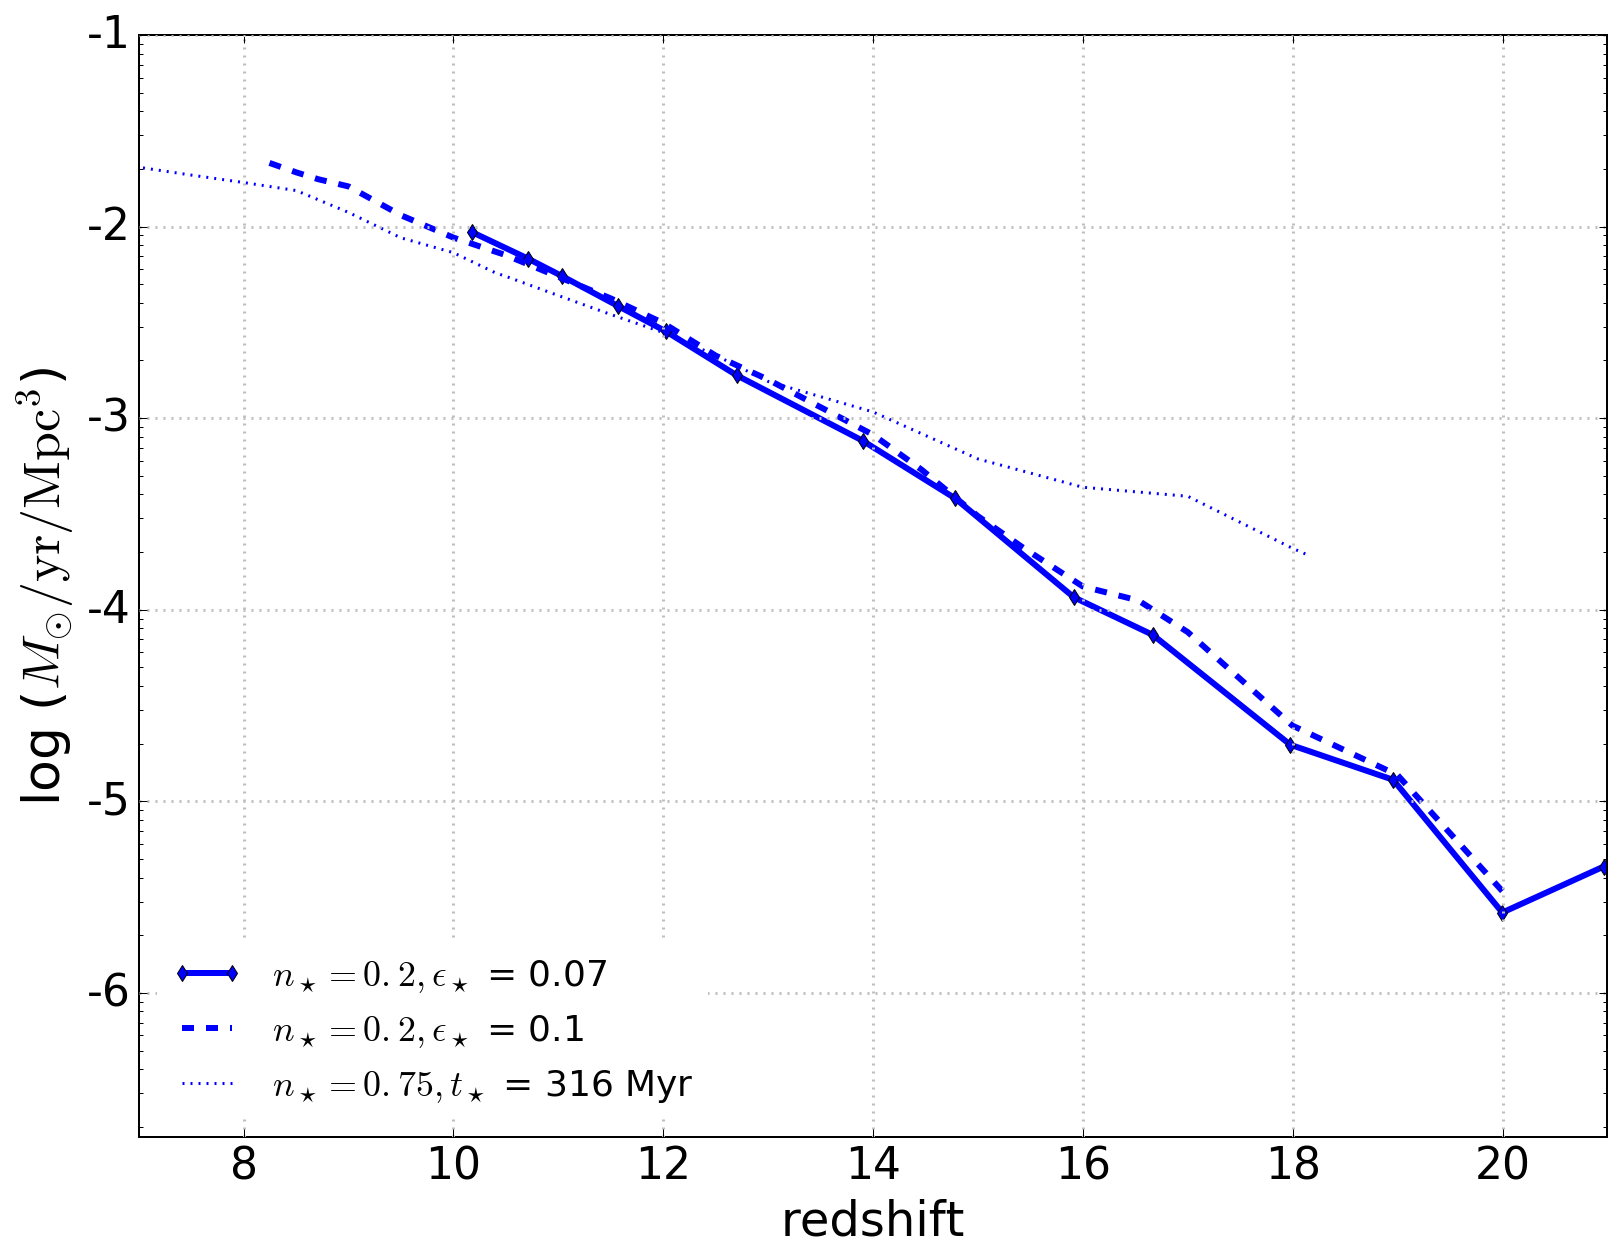

In [8]:
# FuncFormatter class instance defined from the function above
custom_formatter = FuncFormatter(formatter)

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 22
 
sfrRect = [0.1, 0.1, .85, 0.85]
axSFR   = plt.axes(sfrRect)

axSFR.set_yscale('log')
axSFR.set_xlim([7,21])
axSFR.set_ylim([10**-6.75,10**-1])

axSFR.set_xlabel("redshift", size=24)
axSFR.set_ylabel(r'log ($M_{\odot}/{\rm yr/Mpc}^{3}$)', size=26)

axSFR.semilogy(zData,totStarMass,'b-d',  linewidth = 3.0 )
axSFR.semilogy(zDatafr,totStarMassfr,'b--',  linewidth = 3.0 )
axSFR.semilogy(zDataold,totStarMassold,'b:',  linewidth = 1.5 )

axSFR.yaxis.set_major_formatter(custom_formatter)

# axSFR.plot(pz,psfr,'m:', linewidth = 2 )

axSFR.grid(color='0.75', linestyle=':', linewidth=1.5)
leg = axSFR.legend(['$n_\star = 0.2, \epsilon_\star$ = 0.07',
                    '$n_\star = 0.2, \epsilon_\star$ = 0.1',
                    '$n_\star = 0.75, t_\star$ = 316 Myr'],loc='lower left', fontsize=18 )
leg.get_frame().set_linewidth(0.0)

plt.savefig("comparison.pdf")
plt.show()

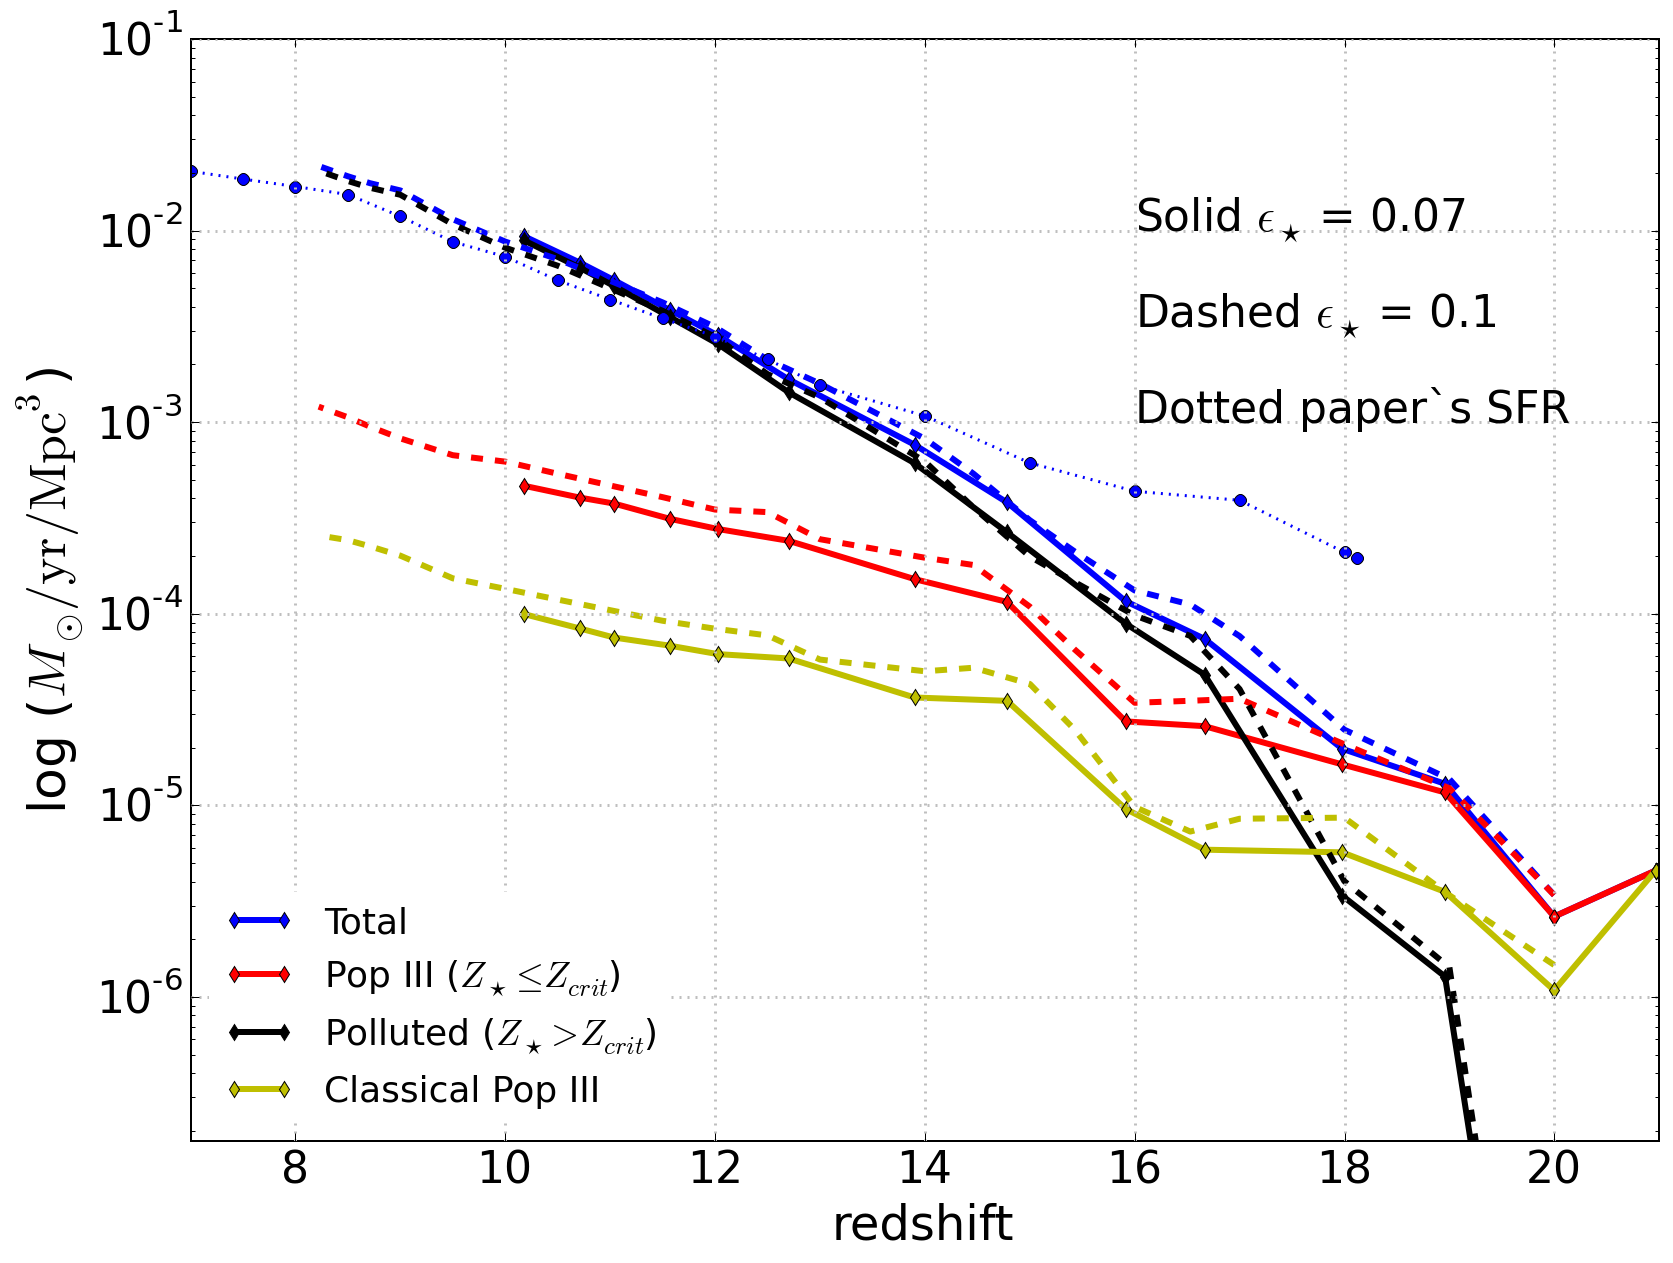

In [38]:
# FuncFormatter class instance defined from the function above
custom_formatter = FuncFormatter(formatter)

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 22
 
sfrRect = [0.1, 0.1, .85, 0.85]
axSFR   = plt.axes(sfrRect)

axSFR.set_yscale('log')
axSFR.set_xlim([7,21])
axSFR.set_ylim([10**-6.75,10**-1])

axSFR.set_xlabel("redshift", size=24)
axSFR.set_ylabel(r'log ($M_{\odot}/{\rm yr/Mpc}^{3}$)', size=26)

axSFR.semilogy(zData,totStarMass,'b-d',  linewidth = 3.0 )
axSFR.semilogy(zData,popIIIMass, 'r-d', linewidth = 3.0 )
axSFR.semilogy(zData,pollMass,'k-d', linewidth = 3.0 )
axSFR.semilogy(zData,subCritMass,'y-d', linewidth = 3.0 )

axSFR.semilogy(zDatafr,totStarMassfr,'b--',  linewidth = 3.0 )
axSFR.semilogy(zDatafr,popIIIMassfr, 'r--', linewidth = 3.0 )
axSFR.semilogy(zDatafr,pollMassfr,'k--', linewidth = 3.0 )
axSFR.semilogy(zDatafr,subCritMassfr,'y--', linewidth = 3.0 )

axSFR.yaxis.set_major_formatter(custom_formatter)

# axSFR.plot(pz,psfr,'m:', linewidth = 2 )

axSFR.grid(color='0.75', linestyle=':', linewidth=1.5)
leg = axSFR.legend(['Total','Pop III ($Z_{\star} \leq Z_{crit}$)','Polluted ($Z_{\star} > Z_{crit}$)','Classical Pop III',
                   ],
                     loc='lower left', fontsize=18 )
leg.get_frame().set_linewidth(0.0)
axSFR.annotate(r'Solid $\epsilon_\star$ = 0.07', xy=(18, 10**-2), xytext=(16, 10**-2)
            )
axSFR.annotate(r'Dashed $\epsilon_\star$ = 0.1', xy=(18, 10**-2.5), xytext=(16, 10**-2.5)
            )
axSFR.annotate(r'Dotted paper`s SFR', xy=(18, 10**-3), xytext=(16, 10**-3)
            )


axSFR.semilogy(zDataold,totStarMassold,'b:o',  linewidth = 1.5 )
# axSFR.semilogy(zDataold,popIIIMassold, 'r:o', linewidth = 1.5 )
# axSFR.semilogy(zDataold,pollMassold,   'k:o',  linewidth = 1.5 )
# axSFR.semilogy(zDataold,subCritMassold,'y:o', linewidth = 1.5 )

plt.savefig("comparison.pdf")
plt.show()